In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Elección de Presidencia | 2024
## Cómputos Distritales
**La información en el archivo .csv se divide en dos secciones:**

#### a. Primera sección, encabezado:

  - Se presenta la hora y la fecha de la generación de reportes y son correspondientes a las que aparece en los reportes HTML. Ejemplo:
    - `05/06/2024 08:00 (UTC-6)`

  - Se presenta el estatus de las actas que se están incluyendo y sus respectivos porcentajes calculados, separados por pipes "|", ejemplo:
    - `ACTAS_ESPERADAS|ACTAS_COMPUTADAS|PORCENTAJE_ACTAS_COMPUTADAS|LISTA_NOMINAL_ACTAS_COMPUTADAS|TOTAL_VOTOS|PORCENTAJE_PARTICIPACION_CIUDADANA`

  - La descripción de cada campo es la siguiente:
    1. **ACTAS_ESPERADAS** - Número de Actas correspondientes, por cada tipo de elección, de todas las casillas aprobadas por el Consejo Distrital Federal. Este conjunto de Actas de Escrutinio y Cómputo conforma el Catálogo de Actas esperadas.
    2. **ACTAS_COMPUTADAS** - Número de Actas de las casillas aprobadas, de las cuales se tiene su correspondiente Acta de Escrutinio y Cómputo al momento del corte de información; la suma total de votos no excede la lista nominal aprobada para la casilla a la que pertenece dicha acta, más el número de representantes de partidos políticos o candidaturas independientes y no caen en cualquiera de los supuestos siguientes: todos los campos en los cuales asientan votos para un partido, una coalición, candidaturas no registradas y votos nulos son ilegibles; o todos ellos están vacíos.
    3. **PORCENTAJE_ACTAS_COMPUTADAS** - Porcentaje de Actas calculado respecto del total de actas esperadas, que al momento del corte de información, han sido computadas. Los decimales son expresados a cuatro posiciones y el decimal de la cuarta posición es truncado y no redondeado.
    4. **LISTA_NOMINAL_ACTAS_COMPUTADAS** - Es el agregado del número de ciudadanos con derecho a votar respecto a las casillas que integran la lista nominal de las casillas aprobadas, cuyas actas ya han sido computadas.
    5. **TOTAL_VOTOS** - El total de votos emitidos. El total de votos se calcula mediante la suma que realiza automáticamente el sistema informático de Cómputos.
    6. **PORCENTAJE_PARTICIPACION_CIUDADANA** - Porcentaje de ciudadanos que votaron con base en la lista nominal de las casillas aprobadas, cuyas actas ya han sido computadas.

#### b. Segunda sección, datos del Acta de Escrutinio y Cómputo:
  - Corresponde a los datos de identificación del acta de escrutinio y cómputo, extraídos de la base de datos; cada línea corresponde a un acta, están separados por pipes "|". Los datos son los siguientes:

    - `CLAVE_CASILLA|CLAVE_ACTA|ID_ENTIDAD|ENTIDAD|ID_DISTRITO_FEDERAL|DISTRITO_FEDERAL|SECCION|ID_CASILLA|TIPO_CASILLA|EXT_CONTIGUA|CASILLA|TIPO_ACTA|PAN|PRI|PRD|PVEM|PT|MC|MORENA|PAN-PRI-PRD|PAN-PRI|PAN-PRD|PRI-PRD|PVEM-PT-MORENA|PVEM-PT|PVEM-MORENA|PT-MORENA|CANDIDATO/A NO REGISTRADO/A|VOTOS NULOS|TOTAL_VOTOS_CALCULADOS|LISTA_NOMINAL|OBSERVACIONES|MECANISMOS_TRASLADO|FECHA_HORA`

  - Descripción de cada campo:
    1. **CLAVE_CASILLA** - Clave única de casilla.
    2. **CLAVE_ACTA** - Clave única de acta.
    3. **ID_ENTIDAD** - Muestra el identificador de la Entidad.
    4. **ENTIDAD** - Indica el nombre de la Entidad Federativa a la que corresponde el Acta.
    5. **ID_DISTRITO_FEDERAL** - Número del Distrito Electoral de la Entidad acorde al tipo de elección.
    6. **DISTRITO_FEDERAL** - Nombre del distrito electoral de la entidad acorde al tipo de elección.
    7. **SECCION** - Corresponde a la clave de la sección de la casilla.
    8. **ID_CASILLA** - Número de la casilla.
    9. **TIPO_CASILLA** - Se refiere al tipo de casilla o Mesa de Escrutinio y Cómputo (MEC): 
       - Para casillas:
         - B - Básica
         - C - Contigua
         - E - Extraordinaria
         - S - Especial
       - Para MEC:
         - A - Voto anticipado
         - M - Voto de los mexicanos en el extranjero, modalidad postal
         - P - Prisión preventiva
         - V - Voto en el extranjero, modalidad por internet
    10. **EXT_CONTIGUA** - Número de casilla contigua a una casilla de tipo extraordinaria.
    11. **CASILLA** - Identifica el tipo de casilla: Urbana o No Urbana.
    12. **TIPO_ACTA** - Número que el Acta de Escrutinio y Cómputo trae impreso:
       - 1 - Acta de Voto en el Extranjero para Presidencia.
       - 2 - Acta de Casilla y MEC para Presidencia.
       - 2E - Acta de Casilla Especial para Presidencia.
    13. **PAN** - Votos para el PAN.
    14. **PRI** - Votos para el PRI.
    15. **PRD** - Votos para el PRD.
    16. **PVEM** - Votos para el PVEM.
    17. **PT** - Votos para el PT.
    18. **MC** - Votos para MC.
    19. **MORENA** - Votos para MORENA.
    20. **PAN_PRI_PRD** - Votos para coalición PAN, PRI y PRD.
    21. **PAN_PRI** - Votos para coalición PAN y PRI.
    22. **PAN_PRD** - Votos para coalición PAN y PRD.
    23. **PRI_PRD** - Votos para coalición PRI y PRD.
    24. **PVEM_PT_MORENA** - Votos para coalición PVEM, PT y MORENA.
    25. **PVEM_PT** - Votos para combinación PVEM y PT.
    26. **PVEM_MORENA** - Votos para combinación PVEM y MORENA.
    27. **PT_MORENA** - Votos para combinación PT y MORENA.
    28. **CANDIDATO/A NO REGISTRADO/A** - Votos para candidaturas no registradas.
    29. **VOTOS NULOS** - Votos nulos.
    30. **TOTAL_VOTOS_CALCULADOS** - Suma de los votos.
    31. **LISTA_NOMINAL** - Número de ciudadanos en la lista nominal.
    32. **OBSERVACIONES** - Detalle sobre el acta.
    33. **MECANISMOS_TRASLADO** - Mecanismos de traslado de paquetes electorales.
    34. **FECHA_HORA** - Último movimiento registrado en el acta (Tiempo del Centro).

**El archivo de candidaturas (CSV) contiene la información de todas las candidaturas por Partidos Políticos y Coalición que participan en la elección y se nombra "PRES_CANDIDATURAS_2024.csv".**

  - Presenta la información de todas las candidaturas separadas por pipes "|", ejemplo:
    - `ID_ENTIDAD|PARTIDO_CI|CANDIDATURA_PROPIETARIA`

  - Descripción de cada campo:
    1. **ID_ENTIDAD** - Identificador de la Entidad.
    2. **PARTIDO_CI** - Siglas del partido político o coalición.
    3. **CANDIDATURA_PROPIETARIA** - Nombre de la candidata o candidato propietario.

## Mas sobre el tipo de casilla

El campo **TIPO_CASILLA** se refiere a la clasificación de la casilla o de la Mesa de Escrutinio y Cómputo (MEC) utilizada para registrar los votos. Este campo indica tanto el lugar donde se emiten los votos como el tipo de electores que pueden votar allí. La distinción en el tipo de casilla permite gestionar de manera precisa los votos según las condiciones locales o específicas de la elección. A continuación, se explican los diferentes valores que puede tomar este campo y su significado:

### Para Casillas Locales:
  - **B (Básica):** Esta es la casilla estándar y se instala en lugares donde el número de electores en una sección no excede el límite establecido para una sola casilla.
  - **C (Contigua):** Se utiliza cuando el número de electores en una sección excede el límite de la casilla básica, por lo que se habilitan casillas adicionales, denominadas contiguas, en el mismo lugar.
  - **E (Extraordinaria):** Se utiliza en áreas donde, por condiciones geográficas, de difícil acceso o especiales, no es posible instalar una casilla básica, contigua o especial.
  - **S (Especial):** Estas casillas están pensadas para electores en tránsito, es decir, para personas que se encuentran fuera de su sección electoral correspondiente y desean ejercer su voto en otra.

### Para la Mesa de Escrutinio y Cómputo (MEC): 
Este tipo de casillas no se utiliza para la votación presencial el día de la elección, sino para contabilizar votos en situaciones especiales, como los de ciudadanos en el extranjero o en prisión preventiva. Estas casillas se identifican con diferentes letras según el tipo de votación que gestionan:

  - **A (Voto Anticipado):** Casilla donde se registran los votos anticipados. Está destinada a electores que emiten su voto antes de la fecha oficial de la elección, por razones específicas aprobadas por el Consejo.
  - **M (Voto de Mexicanos en el Extranjero - Postal):** Es para mexicanos residentes en el extranjero que optan por enviar su voto por correo. Su votación se contabiliza en la modalidad postal.
  - **P (Prisión Preventiva):** Diseñada para ciudadanos que se encuentran en prisión preventiva, permitiéndoles emitir su voto a pesar de su situación.
  - **V (Voto de Mexicanos en el Extranjero - Internet):** Esta casilla gestiona el voto de mexicanos en el extranjero a través de internet. Los votos recibidos en esta modalidad se dividen en:
    - **Votos presenciales:** Emitidos en Módulos Receptores de Votación en el extranjero, aprobados por el INE.
    - **Votos electrónicos:** Emitidos mediante una plataforma de votación en línea para ciudadanos en el extranjero.


### Tipos de Acta

1. **1: Acta del Voto de Mexicanos Residentes en el Extranjero para Presidencia**
   - Usada para registrar los votos emitidos por ciudadanos mexicanos en el extranjero en elecciones presidenciales, ya sea mediante voto postal o internet.

2. **2: Acta de Casilla y Mesas de Escrutinio y Cómputo para Presidencia**
   - Acta estándar que recopila los votos emitidos en casillas locales el día de la elección para cada sección electoral en el país.

3. **2E: Acta de Casilla Especial para Presidencia**
   - Utilizada en casillas especiales para electores en tránsito, que votan fuera de su sección electoral.

### Importancia
Cada tipo de acta permite el correcto registro y clasificación de votos en distintos contextos, asegurando transparencia y precisión en el cómputo electoral.

### Campo **OBSERVACIONES**
El campo **OBSERVACIONES** describe el estado específico de cada acta y su procesamiento en el Sistema de Cómputo, lo cual proporciona contexto adicional sobre cualquier incidente o tratamiento particular que haya recibido el acta. Los posibles valores de este campo son:

1. **Cotejo (Levantada en Casilla):** El acta se compara con la copia que tiene la presidencia del Consejo para verificar la consistencia de la información.

2. **Recuento (Levantada en Consejo Distrital):** Se realiza un nuevo escrutinio y cómputo del acta en el Consejo Distrital, generalmente cuando existen discrepancias o dudas en el acta original.

3. **Paquete no recibido (Para recuento-SRA):** El acta fue clasificada para recuento mediante el Sistema de Registro de Actas (SRA) pero no se recibió el paquete electoral en el Consejo Distrital, por lo cual no se cuenta con el acta física.

4. **Recuento (Para recuento-SRA):** El Sistema de Registro de Actas clasificó el paquete para recuento, y se realiza el proceso correspondiente.

5. **Casilla no instalada (Para recuento-SRA):** La casilla asignada no fue instalada el día de la elección y fue clasificada como no disponible en el Sistema de Registro de Actas para recuento.

6. **Paquete no recibido (Para recuento-SC):** El Sistema de Cómputos Distritales (SC) clasifica el acta para recuento, pero no se recibe el paquete electoral en el Consejo Distrital.

7. **Recuento (Para recuento-SC):** Clasificada para recuento por el Sistema de Cómputos Distritales, se realiza un nuevo escrutinio y cómputo del acta.

8. **Casilla no instalada (Para recuento-SC):** La casilla no fue instalada el día de la elección, y el Sistema de Cómputos Distritales clasifica el paquete para recuento.

9. **Casilla no instalada:** Indica que el acta no fue generada ya que la casilla correspondiente no fue instalada el día de la elección.

10. **Cotejo (Casilla instalada con suspensión definitiva de la votación):** El acta es cotejada contra la copia de la presidencia del Consejo, y se especifica que la votación fue suspendida definitivamente en la casilla.

11. **Paquete no recibido:** El paquete electoral no se recibió en el Consejo Distrital, por lo cual no se cuenta con el acta física.

12. **Paquete sin boletas (Levantada en Consejo Distrital):** Durante el nuevo escrutinio y cómputo en el Consejo Distrital, se determina que el paquete recibido no contiene las boletas electorales.

Cada una de estas observaciones ayuda a documentar cualquier irregularidad o procedimiento adicional aplicado a un acta, asegurando transparencia y detalle en el cómputo electoral.


In [59]:
variables_cols = [
    'PAN','PRI','PVEM',
    'PT','MC','MORENA',
    'PAN_PRI_PRD','PAN_PRI','PRI_PRD',
    'PVEM_PT_MORENA','PVEM_PT','PVEM_MORENA',
    'PT_MORENA','CANDIDATO/A NO REGISTRADO/A','VOTOS NULOS',
    'LISTA_NOMINAL','OBSERVACIONES','ENTIDAD','TIPO_CASILLA',
]
columnas_partidos = [
    'PAN','PRI','PVEM',
    'PT','MC','MORENA',
    'PAN_PRI_PRD','PAN_PRI','PRI_PRD',
    'PVEM_PT_MORENA','PVEM_PT','PVEM_MORENA',
    'PT_MORENA'
]

In [76]:
elecciones_presidenciales = pd.read_csv('../../datasets/elecciones/computos/presidencia/PRES_2024.csv',skiprows=7,encoding='latin1',sep='|',usecols=variables_cols)
elecciones_diputados = pd.read_csv('../../datasets/elecciones/computos/diputado/DIP_FED_2024.csv',skiprows=7,encoding='latin1',sep='|')

/tmp/ipykernel_31228/1341448750.py:1: DtypeWarning: Columns (12,13,15,16,17,18,19,20,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  elecciones_presidenciales = pd.read_csv('../../datasets/elecciones/computos/presidencia/PRES_2024.csv',skiprows=7,encoding='latin1',sep='|',usecols=variables_cols)
/tmp/ipykernel_31228/1341448750.py:2: DtypeWarning: Columns (12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  elecciones_diputados = pd.read_csv('../../datasets/elecciones/computos/diputado/DIP_FED_2024.csv',skiprows=7,encoding='latin1',sep='|')


In [61]:
elecciones_presidenciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170766 entries, 0 to 170765
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   ENTIDAD                      170766 non-null  object
 1   TIPO_CASILLA                 170766 non-null  object
 2   PAN                          170766 non-null  object
 3   PRI                          170766 non-null  object
 4   PVEM                         170766 non-null  object
 5   PT                           170766 non-null  object
 6   MC                           170766 non-null  object
 7   MORENA                       170766 non-null  object
 8   PAN_PRI_PRD                  170766 non-null  object
 9   PAN_PRI                      170766 non-null  object
 10  PRI_PRD                      170766 non-null  object
 11  PVEM_PT_MORENA               170766 non-null  object
 12  PVEM_PT                      170766 non-null  object
 13  PVEM_MORENA   

Todas los datos que tienen como valor `-` son porque la casilla tuvo problemas en instalarse, no se recibió el paquete u otra situación

In [62]:
elecciones_presidenciales[elecciones_presidenciales['PAN'] == '-']['OBSERVACIONES'].value_counts()

OBSERVACIONES
Paquete no recibido                        116
Casilla no instalada                        23
Paquete no recibido (Para recuento-SRA)      5
Paquete no recibido (Para recuento-SC)       1
Name: count, dtype: int64

In [63]:
valores_nulos = elecciones_presidenciales.isin(['-']).any(axis=1)
cantidad_votos_no_registrados = elecciones_presidenciales[valores_nulos]['LISTA_NOMINAL'].sum()
print('El porcentaje de votos no registrados es de: ', cantidad_votos_no_registrados/elecciones_presidenciales['LISTA_NOMINAL'].sum()*100)

El porcentaje de votos no registrados es de:  0.07932750892123464


En base a lo anterior es muy poco con respecto al total por lo que procederemos a eliminarlos y adaptar los tipos a un entero no signado de 16bits para optimizar las posibles operaciones

In [64]:
print('El maximo de votos es: ', elecciones_presidenciales['LISTA_NOMINAL'].max())

El maximo de votos es:  38439


In [65]:
elecciones_presidenciales = elecciones_presidenciales[~valores_nulos]
col_extendidas = columnas_partidos + ['CANDIDATO/A NO REGISTRADO/A','VOTOS NULOS','LISTA_NOMINAL']
elecciones_presidenciales[col_extendidas] = elecciones_presidenciales[col_extendidas].apply(np.uint32)

In [66]:
elecciones_presidenciales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170621 entries, 0 to 170765
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   ENTIDAD                      170621 non-null  object
 1   TIPO_CASILLA                 170621 non-null  object
 2   PAN                          170621 non-null  uint32
 3   PRI                          170621 non-null  uint32
 4   PVEM                         170621 non-null  uint32
 5   PT                           170621 non-null  uint32
 6   MC                           170621 non-null  uint32
 7   MORENA                       170621 non-null  uint32
 8   PAN_PRI_PRD                  170621 non-null  uint32
 9   PAN_PRI                      170621 non-null  uint32
 10  PRI_PRD                      170621 non-null  uint32
 11  PVEM_PT_MORENA               170621 non-null  uint32
 12  PVEM_PT                      170621 non-null  uint32
 13  PVEM_MORENA        

In [67]:
elecciones_presidenciales.head()

,ENTIDAD,TIPO_CASILLA,PAN,PRI,PVEM,PT,MC,MORENA,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA,PT_MORENA,CANDIDATO/A NO REGISTRADO/A,VOTOS NULOS,LISTA_NOMINAL,OBSERVACIONES
0,AGUASCALIENTES,V,684,59,10,13,48,402,129,5,0,101,0,3,9,3,16,1841,Cotejo (Levantada en Casilla)
1,AGUASCALIENTES,V,102,10,2,2,4,90,12,1,0,8,1,1,1,1,0,138,Cotejo (Levantada en Casilla)
2,AGUASCALIENTES,M,88,4,4,4,12,155,25,2,0,48,0,1,6,2,1,549,Cotejo (Levantada en Casilla)
3,AGUASCALIENTES,B,69,14,17,15,40,193,2,1,0,10,1,1,2,0,12,660,Cotejo (Levantada en Casilla)
4,AGUASCALIENTES,C,74,11,17,18,42,182,3,0,0,8,2,2,1,0,21,660,Recuento (Para recuento-SRA)


In [77]:
elecciones_diputados.head()

,CLAVE_CASILLA,CLAVE_ACTA,ID_ENTIDAD,ENTIDAD,ID_DISTRITO_FEDERAL,DISTRITO_FEDERAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,PVEM_PT,PVEM_MORENA,PT_MORENA,CANDIDATO/A NO REGISTRADO/A,VOTOS NULOS,TOTAL_VOTOS_CALCULADOS,LISTA_NOMINAL,OBSERVACIONES,MECANISMOS_TRASLADO,FECHA_HORA
0,'010338B0100','010338B01004',"=""01""",AGUASCALIENTES,"=""001""",JESÚS MARÍA,"=""0338""","=""01""",B,"=""00""",...,0,0,3,1,20,424,660,Recuento (Para recuento-SRA),F-D,06/06/2024 14:45:13
1,'010338C0100','010338C01004',"=""01""",AGUASCALIENTES,"=""001""",JESÚS MARÍA,"=""0338""","=""01""",C,"=""00""",...,2,3,0,0,18,402,660,Recuento (Para recuento-SRA),F-D,06/06/2024 14:36:22
2,'010338C0200','010338C02004',"=""01""",AGUASCALIENTES,"=""001""",JESÚS MARÍA,"=""0338""","=""02""",C,"=""00""",...,0,2,0,0,24,403,659,Recuento (Para recuento-SRA),F-D,06/06/2024 14:39:59
3,'010339B0100','010339B01004',"=""01""",AGUASCALIENTES,"=""001""",JESÚS MARÍA,"=""0339""","=""01""",B,"=""00""",...,0,2,3,0,12,382,615,Cotejo (Levantada en Casilla),F-D,06/06/2024 14:31:36
4,'010339C0100','010339C01004',"=""01""",AGUASCALIENTES,"=""001""",JESÚS MARÍA,"=""0339""","=""01""",C,"=""00""",...,0,2,0,0,17,386,615,Recuento (Para recuento-SRA),F-D,06/06/2024 14:38:37


In [68]:
elecciones_presidenciales_muestra = elecciones_presidenciales.sample(
    n=10_000,
    random_state=1
)
elecciones_presidenciales_muestra = elecciones_presidenciales_muestra[(elecciones_presidenciales_muestra['LISTA_NOMINAL'] < 2_000) & (elecciones_presidenciales_muestra['LISTA_NOMINAL']>100)]
elecciones_presidenciales_muestra.head()

,ENTIDAD,TIPO_CASILLA,PAN,PRI,PVEM,PT,MC,MORENA,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA,PT_MORENA,CANDIDATO/A NO REGISTRADO/A,VOTOS NULOS,LISTA_NOMINAL,OBSERVACIONES
92523,MÉXICO,B,11,135,32,9,53,98,10,1,1,4,3,1,2,1,14,657,Recuento (Para recuento-SRA)
6662,BAJA CALIFORNIA,C,3,1,9,9,12,157,1,0,0,9,1,2,4,0,2,564,Recuento (Para recuento-SRA)
166229,YUCATÁN,B,60,3,8,5,29,171,4,0,0,13,0,4,2,0,6,447,Recuento (Para recuento-SRA)
60694,HIDALGO,C,11,19,17,12,43,210,0,0,0,0,0,0,0,1,13,502,Cotejo (Levantada en Casilla)
23650,CHIHUAHUA,B,64,32,11,13,41,124,9,2,0,14,2,1,3,0,6,576,Recuento (Para recuento-SRA)


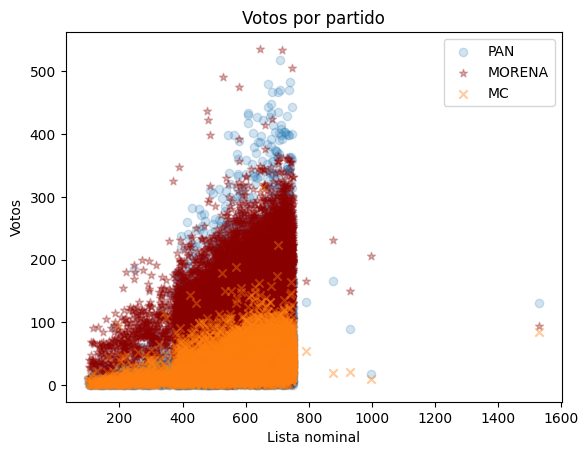

In [69]:
plt.scatter(
    elecciones_presidenciales_muestra['LISTA_NOMINAL'],
    elecciones_presidenciales_muestra['PAN'],
    marker='o',
    alpha=0.2
)
plt.scatter(
    elecciones_presidenciales_muestra['LISTA_NOMINAL'],
    elecciones_presidenciales_muestra['MORENA'],
    marker='*',
    alpha=0.3,
    color = 'darkred'
)
plt.scatter(
    elecciones_presidenciales_muestra['LISTA_NOMINAL'],
    elecciones_presidenciales_muestra['MC'],
    alpha=0.4,
    marker='x'
)
plt.xlabel('Lista nominal')
plt.ylabel('Votos')
plt.title('Votos por partido')
plt.legend(['PAN','MORENA','MC'])

plt.show()

**Tal vez sea posible usar un perceptron para clasificar por tipos de casilla en función de la cantidad de lista nominal** pues recordemos que la casilla tipo Básica solo tiene 750 cartas

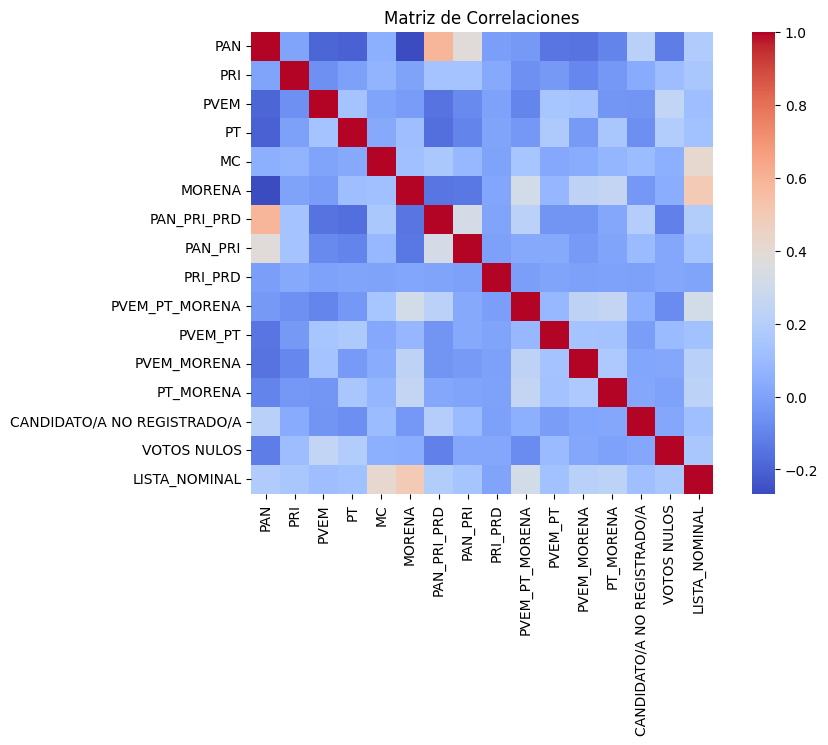

In [70]:
plt.figure(figsize=(10,6))
matriz_correlaciones = elecciones_presidenciales_muestra.corr(numeric_only=True)
sns.heatmap(
    matriz_correlaciones,
    cmap='coolwarm',
    square=True
)
plt.title('Matriz de Correlaciones')
plt.show()

- **Podríamos investigar que tanto ayudan las coaliciones al resultado final**
- **Dados los votos sobre PAN,MC, entidad(categórico) y lista nominal determinar los votos de MORENA** puesto que en general la correlacion es negativa entre MORENA y PAN
- **Podemos juntar con otros datasets, por ejemplo, senadores y diputados**

In [71]:
tipos_casillas = elecciones_presidenciales['TIPO_CASILLA'].value_counts()
tipos_casillas

TIPO_CASILLA
C    90188
B    70439
E     8232
S     1177
A      284
P      150
M       87
V       64
Name: count, dtype: int64

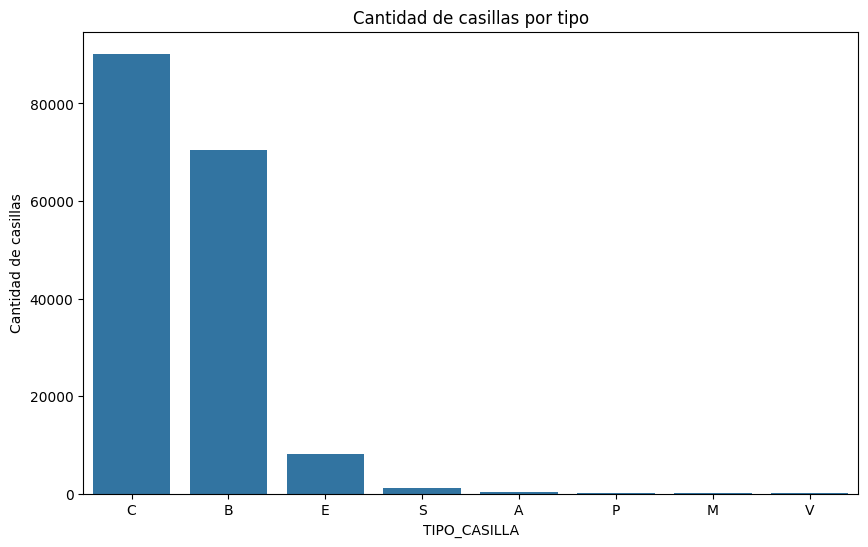

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=tipos_casillas.index,
    y=tipos_casillas.values
)
plt.title('Cantidad de casillas por tipo')
plt.ylabel('Cantidad de casillas')
plt.show()